<a href="https://colab.research.google.com/github/Turki-alkhulaqi/programming-lecture/blob/main/Lab_9_1_Regularization_TR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Dogs vs. Cats Classification

Select free T4 GPU in Runtime settings

## Download data

In [3]:
!pip install -q gdown
!gdown https://drive.google.com/uc?id=12WhCCpKTWpeBztLegcoYx2gMo2KbaxDG

Downloading...
From (original): https://drive.google.com/uc?id=12WhCCpKTWpeBztLegcoYx2gMo2KbaxDG
From (redirected): https://drive.google.com/uc?id=12WhCCpKTWpeBztLegcoYx2gMo2KbaxDG&confirm=t&uuid=41540f11-7607-42f0-b4e8-3454c2853dd4
To: /content/dogs-vs-cats.zip
100% 852M/852M [00:17<00:00, 49.9MB/s]


In [40]:
import zipfile

with zipfile.ZipFile('dogs-vs-cats.zip', 'r') as zip_file:
    zip_file.extractall('data')

with zipfile.ZipFile('data/train.zip', 'r') as zip_file:
    zip_file.extractall('data/')

In [ ]:
## Prepare load

In [41]:
import os
import shutil
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Paths
base_dir = 'data/train'
train_dir = 'data/train_split'
val_dir = 'data/val_split'

# Create directories
os.makedirs(os.path.join(train_dir, 'dogs'), exist_ok=True)
os.makedirs(os.path.join(train_dir, 'cats'), exist_ok=True)
os.makedirs(os.path.join(val_dir, 'dogs'), exist_ok=True)
os.makedirs(os.path.join(val_dir, 'cats'), exist_ok=True)

# Split data
filenames = os.listdir(base_dir)
train_files, val_files = train_test_split(filenames, test_size=0.2, random_state=42)

for file in train_files:
    if 'dog' in file:
        shutil.move(os.path.join(base_dir, file), os.path.join(train_dir, 'dogs', file))
    elif 'cat' in file:
        shutil.move(os.path.join(base_dir, file), os.path.join(train_dir, 'cats', file))

for file in val_files:
    if 'dog' in file:
        shutil.move(os.path.join(base_dir, file), os.path.join(val_dir, 'dogs', file))
    elif 'cat' in file:
        shutil.move(os.path.join(base_dir, file), os.path.join(val_dir, 'cats', file))

## Create data generators

In [42]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Load data from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


## Create basic CNN classification model

In [43]:
from tensorflow.keras import models, layers

# Build the model
model_basic = models.Sequential([
    layers.Input(shape=(150, 150, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_basic.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

## Train basic model

In [44]:
history_model_basic = model_basic.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator,
)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 62ms/step - accuracy: 0.5677 - loss: 0.6829 - val_accuracy: 0.7046 - val_loss: 0.5739
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 66ms/step - accuracy: 0.7416 - loss: 0.5199 - val_accuracy: 0.7770 - val_loss: 0.4711
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 78s 60ms/step - accuracy: 0.8034 - loss: 0.4297 - val_accuracy: 0.8050 - val_loss: 0.4320
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 61ms/step - accuracy: 0.8412 - loss: 0.3546 - val_accuracy: 0.8228 - val_loss: 0.3936
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 62ms/step - accuracy: 0.8888 - loss: 0.2640 - val_accuracy: 0.8238 - val_loss: 0.4227
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 61ms/step - accuracy: 0.9317 - loss: 0.1703 - val_accuracy: 0.8148 - val_loss: 0.5672
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 62ms/step - accuracy: 0.9714 - loss: 0.0817 - val_accuracy: 0.8200 - val_loss: 0.6258
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 62ms/step - accuracy: 0.9844 - loss: 0.0470 - 

## Plot accuracy and loss

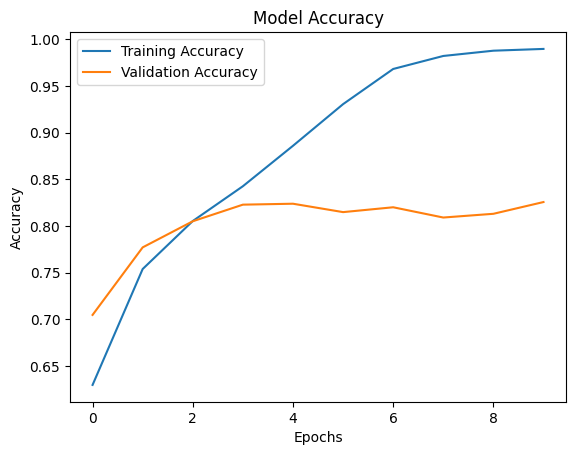

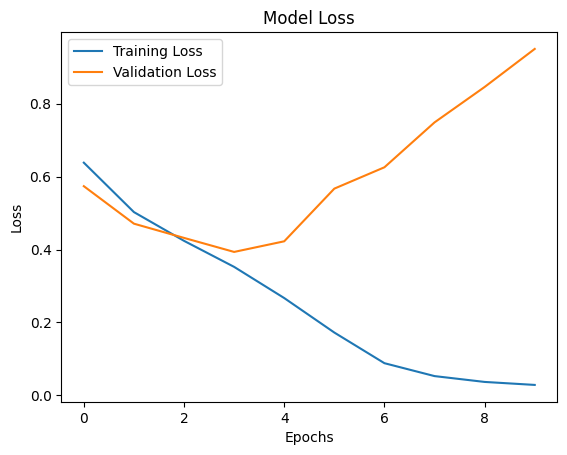

In [45]:
plt.plot(history_model_basic.history['accuracy'], label='Training Accuracy')
plt.plot(history_model_basic.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history_model_basic.history['loss'], label='Training Loss')
plt.plot(history_model_basic.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Tasks

## Dropout Regularization
• Add a Dropout layer after one or more convolutional or dense layers.

• Suggested rates: 0.3 or 0.5.

• Retrain and observe the effect on validation accuracy and overfitting.




In [11]:
from tensorflow.keras import models, layers

# Build the model with Dropout regularization
model_dropout = models.Sequential([
    layers.Input(shape=(150, 150, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),  # Dropout after first conv block

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),  # Dropout after second conv block

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),  # Dropout after third conv block

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Higher dropout rate for dense layer
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_dropout.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

## Train regularized model

In [12]:
history_dropout = model_dropout.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator,
)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 47s 68ms/step - accuracy: 0.5881 - loss: 0.6917 - val_accuracy: 0.7062 - val_loss: 0.5565
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 62ms/step - accuracy: 0.7180 - loss: 0.5481 - val_accuracy: 0.7728 - val_loss: 0.4708
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 60ms/step - accuracy: 0.7716 - loss: 0.4767 - val_accuracy: 0.7960 - val_loss: 0.4348
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 61ms/step - accuracy: 0.7990 - loss: 0.4279 - val_accuracy: 0.8108 - val_loss: 0.4180
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 67ms/step - accuracy: 0.8248 - loss: 0.3900 - val_accuracy: 0.8188 - val_loss: 0.4038
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 43s 68ms/step - accuracy: 0.8481 - loss: 0.3542 - val_accuracy: 0.8318 - val_loss: 0.3799
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 65ms/step - accuracy: 0.8600 - loss: 0.3236 - val_accuracy: 0.8386 - val_loss: 0.3650
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 64ms/step - accuracy: 0.8717 - loss: 0.3013 - 

## Plot accuracy and loss Dropout Regularization

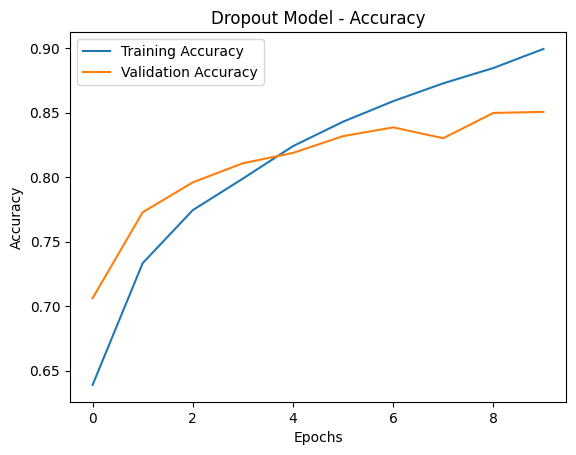

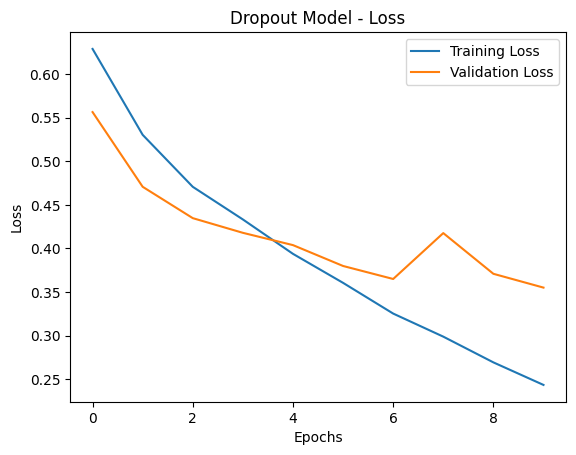

In [13]:
plt.plot(history_dropout.history['accuracy'], label='Training Accuracy')
plt.plot(history_dropout.history['val_accuracy'], label='Validation Accuracy')
plt.title('Dropout Model - Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history_dropout.history['loss'], label='Training Loss')
plt.plot(history_dropout.history['val_loss'], label='Validation Loss')
plt.title('Dropout Model - Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## L2 Weight Regularization

• Add kernel_regularizer=tf.keras.regularizers.l2 (0.001) to selected layers.

• Train the model and compare validation accuracy.

In [16]:
from tensorflow.keras import models, layers
from tensorflow.keras import regularizers

# Build the model with L2 regularization
model_l2 = models.Sequential([
    layers.Input(shape=(150, 150, 3)),
    layers.Conv2D(32, (3, 3), activation='relu',
                 kernel_regularizer=regularizers.l2(0.001)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu',
                 kernel_regularizer=regularizers.l2(0.001)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu',
                 kernel_regularizer=regularizers.l2(0.001)),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu',
                kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_l2.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

## Train L2 Weight Regularization

In [17]:
history_l2 = model_l2.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator,
)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 46s 67ms/step - accuracy: 0.6015 - loss: 0.7543 - val_accuracy: 0.7024 - val_loss: 0.6092
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 63ms/step - accuracy: 0.7311 - loss: 0.5715 - val_accuracy: 0.7718 - val_loss: 0.5284
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 43s 69ms/step - accuracy: 0.7636 - loss: 0.5273 - val_accuracy: 0.7718 - val_loss: 0.5166
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 61ms/step - accuracy: 0.7870 - loss: 0.4954 - val_accuracy: 0.7602 - val_loss: 0.5300
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 60ms/step - accuracy: 0.7948 - loss: 0.4943 - val_accuracy: 0.8028 - val_loss: 0.4743
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 61ms/step - accuracy: 0.8127 - loss: 0.4628 - val_accuracy: 0.8058 - val_loss: 0.4666
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 61ms/step - accuracy: 0.8189 - loss: 0.4499 - val_accuracy: 0.8046 - val_loss: 0.4978
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 37s 60ms/step - accuracy: 0.8250 - loss: 0.4457 - 

## Plot accuracy and loss L2 weight Regularization

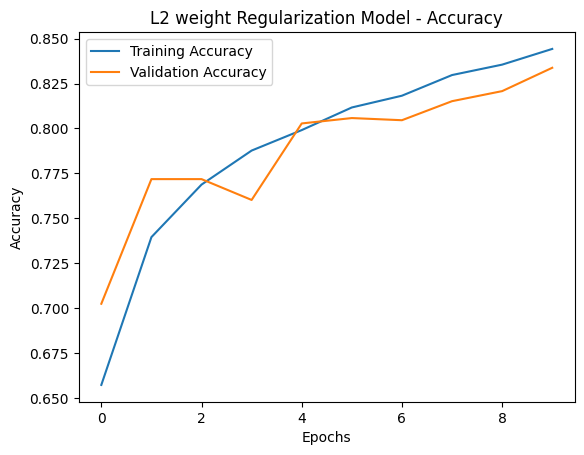

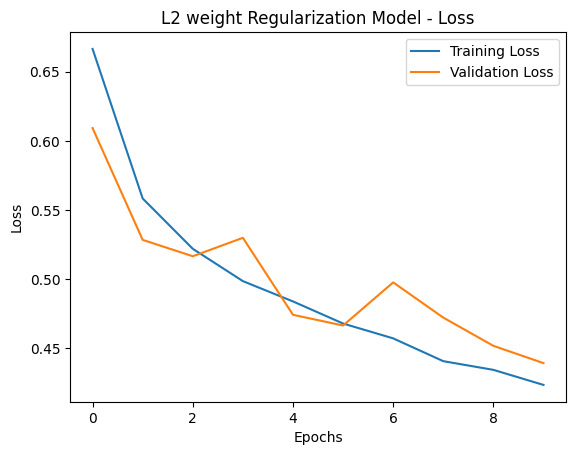

In [18]:
plt.plot(history_l2.history['accuracy'], label='Training Accuracy')
plt.plot(history_l2.history['val_accuracy'], label='Validation Accuracy')
plt.title('L2 weight Regularization Model - Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history_l2.history['loss'], label='Training Loss')
plt.plot(history_l2.history['val_loss'], label='Validation Loss')
plt.title('L2 weight Regularization Model - Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Combine Dropout and L2
- Use both regularization methods together.
- Try at least two different configurations and compare results.

Configuration 1: Moderate Regularization

L2 λ=0.001, Dropout 0.3-0.5

In [20]:
from tensorflow.keras import models, layers, regularizers

# Model with moderate Dropout + L2 regularization
model_combo1 = models.Sequential([
    layers.Input(shape=(150, 150, 3)),
    layers.Conv2D(32, (3, 3), activation='relu',
                 kernel_regularizer=regularizers.l2(0.001)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),

    layers.Conv2D(64, (3, 3), activation='relu',
                 kernel_regularizer=regularizers.l2(0.001)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),

    layers.Conv2D(128, (3, 3), activation='relu',
                 kernel_regularizer=regularizers.l2(0.001)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),

    layers.Flatten(),
    layers.Dense(128, activation='relu',
                kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

model_combo1.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

Configuration 2: Stronger Regularization

L2 λ=0.001, Dropout 0.4-0.6 (stronger regularization)

In [21]:
from tensorflow.keras import models, layers, regularizers

# Model with stronger Dropout + L2 regularization
model_combo2 = models.Sequential([
    layers.Input(shape=(150, 150, 3)),
    layers.Conv2D(32, (3, 3), activation='relu',
                 kernel_regularizer=regularizers.l2(0.001)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.4),

    layers.Conv2D(64, (3, 3), activation='relu',
                 kernel_regularizer=regularizers.l2(0.001)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.4),

    layers.Conv2D(128, (3, 3), activation='relu',
                 kernel_regularizer=regularizers.l2(0.001)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.4),

    layers.Flatten(),
    layers.Dense(128, activation='relu',
                kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.6),
    layers.Dense(1, activation='sigmoid')
])

model_combo2.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

## Training and Comparison

In [22]:
# Train both models
history_combo1 = model_combo1.fit(
    train_generator,
    epochs=5,  # Slightly more epochs to see stabilization
    validation_data=val_generator,
)

history_combo2 = model_combo2.fit(
    train_generator,
    epochs=5,
    validation_data=val_generator,
)

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 46s 64ms/step - accuracy: 0.5557 - loss: 0.8615 - val_accuracy: 0.6364 - val_loss: 0.6517
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 37s 60ms/step - accuracy: 0.6509 - loss: 0.6575 - val_accuracy: 0.6954 - val_loss: 0.6202
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 60ms/step - accuracy: 0.6907 - loss: 0.6152 - val_accuracy: 0.6990 - val_loss: 0.6170
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 37s 60ms/step - accuracy: 0.7088 - loss: 0.5986 - val_accuracy: 0.7052 - val_loss: 0.5925
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 60ms/step - accuracy: 0.7257 - loss: 0.5906 - val_accuracy: 0.7500 - val_loss: 0.5440
Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 45s 62ms/step - accuracy: 0.4912 - loss: 0.9944 - val_accuracy: 0.5072 - val_loss: 0.7311
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 60ms/step - accuracy: 0.5047 - loss: 0.7215 - val_accuracy: 0.6098 - val_loss: 0.6823
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 37s 59ms/step - accuracy: 0.5800 - loss: 0.6785 - val_accu

## Plot accuracy and loss for Combine Dropout and L2

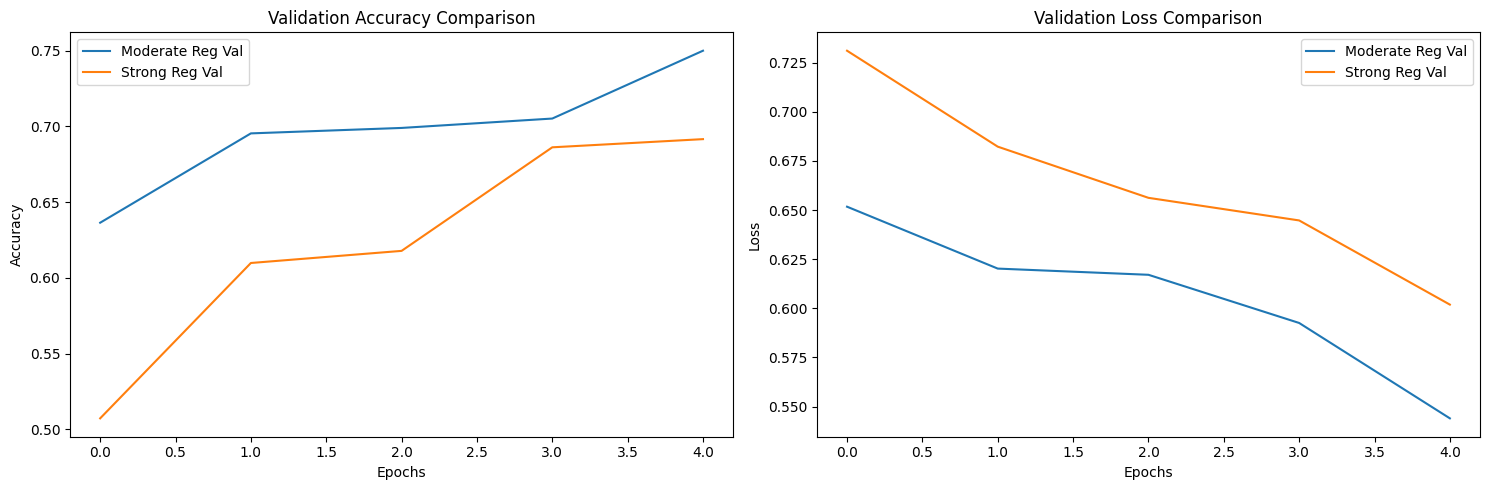

In [23]:
# Comparative visualization
plt.figure(figsize=(15, 5))

# Accuracy comparison
plt.subplot(1, 2, 1)
plt.plot(history_combo1.history['val_accuracy'], label='Moderate Reg Val')
plt.plot(history_combo2.history['val_accuracy'], label='Strong Reg Val')
plt.title('Validation Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss comparison
plt.subplot(1, 2, 2)
plt.plot(history_combo1.history['val_loss'], label='Moderate Reg Val')
plt.plot(history_combo2.history['val_loss'], label='Strong Reg Val')
plt.title('Validation Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

## Early Stopping
• Use EarlyStopping(monitor=’val_loss’, patience=3) to avoid overfitting and reduce training
time.

In [30]:
from tensorflow.keras import models, layers
from tensorflow.keras.callbacks import EarlyStopping

# Build the model (same as before)
model_earlyStop = models.Sequential([
    layers.Input(shape=(150, 150, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model (same as before)
model_earlyStop.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Define Early Stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=3,         # Wait for 3 epochs with no improvement
    restore_best_weights=True  # Restore weights from best epoch
)

In [31]:

# Train the model with Early Stopping
history_earlyStop = model_basic.fit(
    train_generator,
    epochs=25,  # Set higher than needed (early stopping will intervene)
    validation_data=val_generator,
    callbacks=[early_stopping],  # Add the EarlyStopping callback
)

Epoch 1/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 66ms/step - accuracy: 0.9229 - loss: 0.1931 - val_accuracy: 0.8342 - val_loss: 0.4251
Epoch 2/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 78s 60ms/step - accuracy: 0.9557 - loss: 0.1188 - val_accuracy: 0.8078 - val_loss: 0.5696
Epoch 3/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 61ms/step - accuracy: 0.9796 - loss: 0.0589 - val_accuracy: 0.8232 - val_loss: 0.7020
Epoch 4/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 37s 60ms/step - accuracy: 0.9877 - loss: 0.0374 - val_accuracy: 0.8214 - val_loss: 0.9009


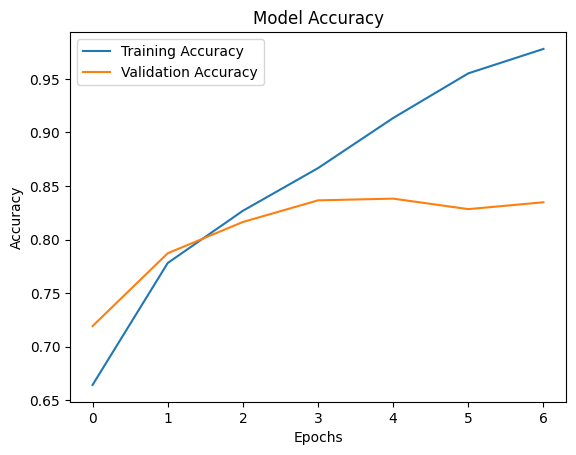

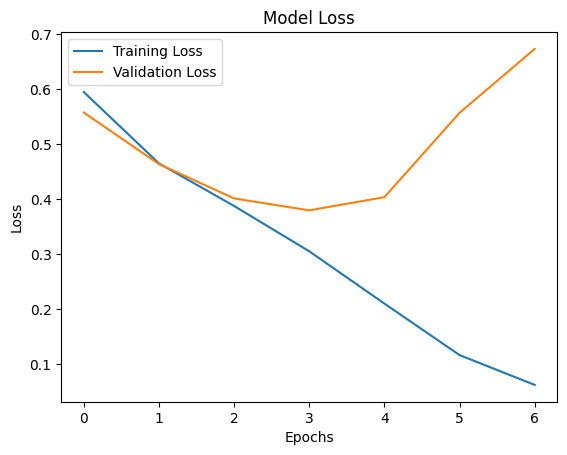

In [32]:
plt.plot(history_model_basic.history['accuracy'], label='Training Accuracy')
plt.plot(history_model_basic.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history_model_basic.history['loss'], label='Training Loss')
plt.plot(history_model_basic.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Data Augmentation
• Modify the ImageDataGenerator for the training set to include:

– rotation_range=20

– width_shift_range=0.2

– height_shift_range=0.2

– horizontal_flip=True

– zoom_range=0.2

• Keep the validation generator unchanged (rescaling only).

• Evaluate the effect on training dynamics and validation accuracy.

In [34]:

# Modified training data generator with augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,       # Random rotation up to 20 degrees
    width_shift_range=0.2,   # Random horizontal shift by 20% of width
    height_shift_range=0.2,  # Random vertical shift by 20% of height
    horizontal_flip=True,    # Random horizontal flipping
    zoom_range=0.2           # Random zoom by 20%
)

# Validation generator remains unchanged (only rescaling)
val_datagen = ImageDataGenerator(rescale=1./255)

# Load augmented training data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

# Load validation data (no augmentation)
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [35]:
from tensorflow.keras import models, layers

# Build the basic CNN model
model_basic = models.Sequential([
    layers.Input(shape=(150, 150, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_basic.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [36]:
# Train the model with augmented data
history_augmented = model_basic.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator,
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 138s 216ms/step - accuracy: 0.5698 - loss: 0.6942 - val_accuracy: 0.7168 - val_loss: 0.5704
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 135s 216ms/step - accuracy: 0.6839 - loss: 0.5923 - val_accuracy: 0.7138 - val_loss: 0.5536
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 135s 217ms/step - accuracy: 0.7196 - loss: 0.5514 - val_accuracy: 0.7574 - val_loss: 0.4889
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 133s 213ms/step - accuracy: 0.7396 - loss: 0.5219 - val_accuracy: 0.7888 - val_loss: 0.4406
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 133s 213ms/step - accuracy: 0.7585 - loss: 0.4946 - val_accuracy: 0.8030 - val_loss: 0.4180
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 135s 216ms/step - accuracy: 0.7695 - loss: 0.4766 - val_accuracy: 0.8000 - val_loss: 0.4172
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 133s 213ms/step - accuracy: 0.7792 - loss: 0.4609 - val_accuracy: 0.8132 - val_loss: 0.4086
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 136s 217ms/step - accuracy: 0.7918 -

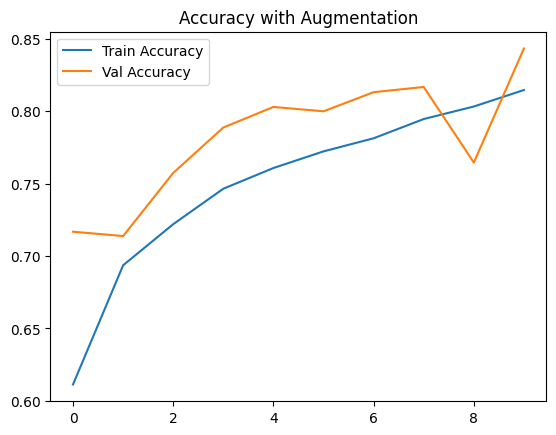

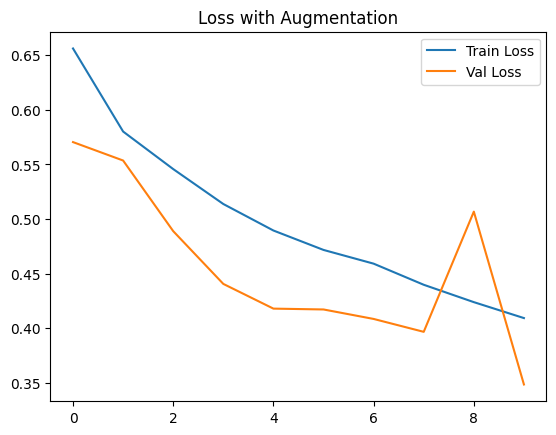

In [37]:
plt.plot(history_augmented.history['accuracy'], label='Train Accuracy')
plt.plot(history_augmented.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy with Augmentation')
plt.legend()
plt.show()

plt.plot(history_augmented.history['loss'], label='Train Loss')
plt.plot(history_augmented.history['val_loss'], label='Val Loss')
plt.title('Loss with Augmentation')
plt.legend()
plt.show()

In [46]:
# List all variables in your current session
%who

# Or to see just the history objects (they typically contain 'history' in their name)
[v for v in dir() if 'history' in v.lower()]

EarlyStopping	 ImageDataGenerator	 base_dir	 early_stopping	 file	 filenames	 history_augmented	 history_combo1	 history_combo2	 
history_dropout	 history_earlyStop	 history_l2	 history_model_basic	 history_name	 layers	 model_basic	 model_combo1	 model_combo2	 
model_dropout	 model_earlyStop	 model_l2	 models	 os	 plt	 regularizers	 shutil	 train_datagen	 
train_dir	 train_files	 train_generator	 train_test_split	 val_datagen	 val_dir	 val_files	 val_generator	 zip_file	 
zipfile	 


['history_augmented',
 'history_combo1',
 'history_combo2',
 'history_dropout',
 'history_earlyStop',
 'history_l2',
 'history_model_basic',
 'history_name']

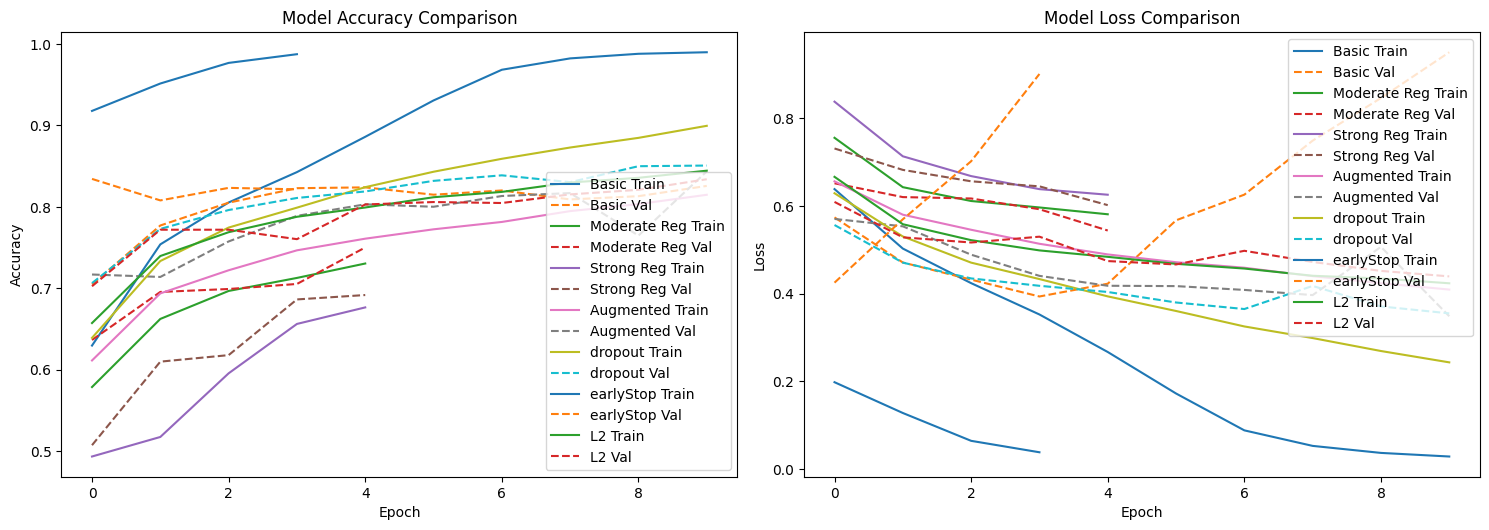

In [47]:
import matplotlib.pyplot as plt
import numpy as np

def plot_history(histories, labels):
    plt.figure(figsize=(15, 10))

    # Accuracy plot
    plt.subplot(2, 2, 1)
    for history, label in zip(histories, labels):
        plt.plot(history.history['accuracy'], label=label+' Train')
        plt.plot(history.history['val_accuracy'], '--', label=label+' Val')
    plt.title('Model Accuracy Comparison')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()

    # Loss plot
    plt.subplot(2, 2, 2)
    for history, label in zip(histories, labels):
        plt.plot(history.history['loss'], label=label+' Train')
        plt.plot(history.history['val_loss'], '--', label=label+' Val')
    plt.title('Model Loss Comparison')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Assuming you have these history objects:
histories = [history_model_basic, history_combo1, history_combo2, history_augmented, history_dropout, history_earlyStop, history_l2]
labels = ['Basic', 'Moderate Reg', 'Strong Reg', 'Augmented', 'dropout', 'earlyStop', 'L2']
plot_history(histories, labels)

In [48]:
from tabulate import tabulate

def get_convergence_epoch(history):
    # Find epoch where validation loss was lowest
    return np.argmin(history.history['val_loss']) + 1

summary_data = []
for history, label in zip(histories, labels):
    summary_data.append([
        label,
        'Dropout+L2' if 'combo' in label.lower() else ('Augmentation' if 'augmented' in label.lower() else 'None'),
        'Yes' if 'augmented' in label.lower() else 'No',
        f"{max(history.history['val_accuracy']):.4f}",
        get_convergence_epoch(history)
    ])

print(tabulate(summary_data,
               headers=['Model', 'Regularization', 'Augmentation', 'Val Accuracy', 'Convergence Epoch'],
               tablefmt='grid'))

+--------------+------------------+----------------+----------------+---------------------+
| Model        | Regularization   | Augmentation   |   Val Accuracy |   Convergence Epoch |
+==============+==================+================+================+=====================+
| Basic        | None             | No             |         0.8256 |                   4 |
+--------------+------------------+----------------+----------------+---------------------+
| Moderate Reg | None             | No             |         0.75   |                   5 |
+--------------+------------------+----------------+----------------+---------------------+
| Strong Reg   | None             | No             |         0.6916 |                   5 |
+--------------+------------------+----------------+----------------+---------------------+
| Augmented    | Augmentation     | Yes            |         0.8434 |                  10 |
+--------------+------------------+----------------+----------------+-----------

157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step


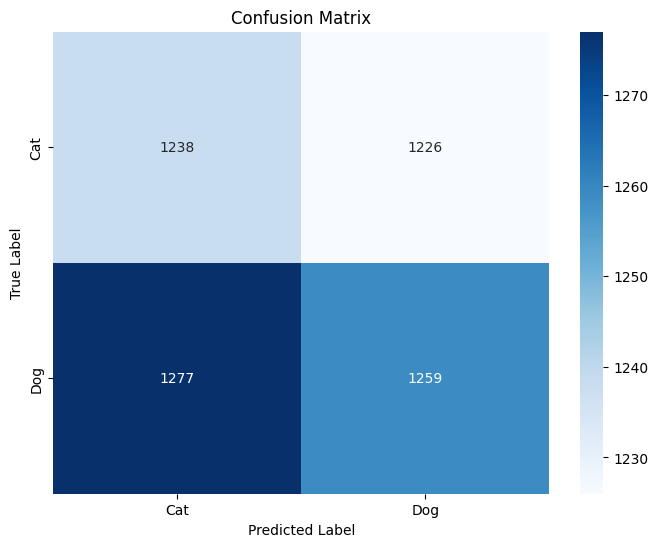

True Positives: 1259
False Positives: 1226
True Negatives: 1238
False Negatives: 1277


In [49]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Select best model (highest val accuracy)
best_model_idx = np.argmax([max(h.history['val_accuracy']) for h in histories])
best_model = [model_basic, model_combo1, model_combo2, model_basic, model_dropout, model_earlyStop, model_l2][best_model_idx]

# Get predictions
y_pred = best_model.predict(val_generator)
y_pred_classes = (y_pred > 0.5).astype(int)
y_true = val_generator.classes

# Confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Cat', 'Dog'],
            yticklabels=['Cat', 'Dog'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Print classification metrics
print(f"True Positives: {cm[1][1]}")
print(f"False Positives: {cm[0][1]}")
print(f"True Negatives: {cm[0][0]}")
print(f"False Negatives: {cm[1][0]}")

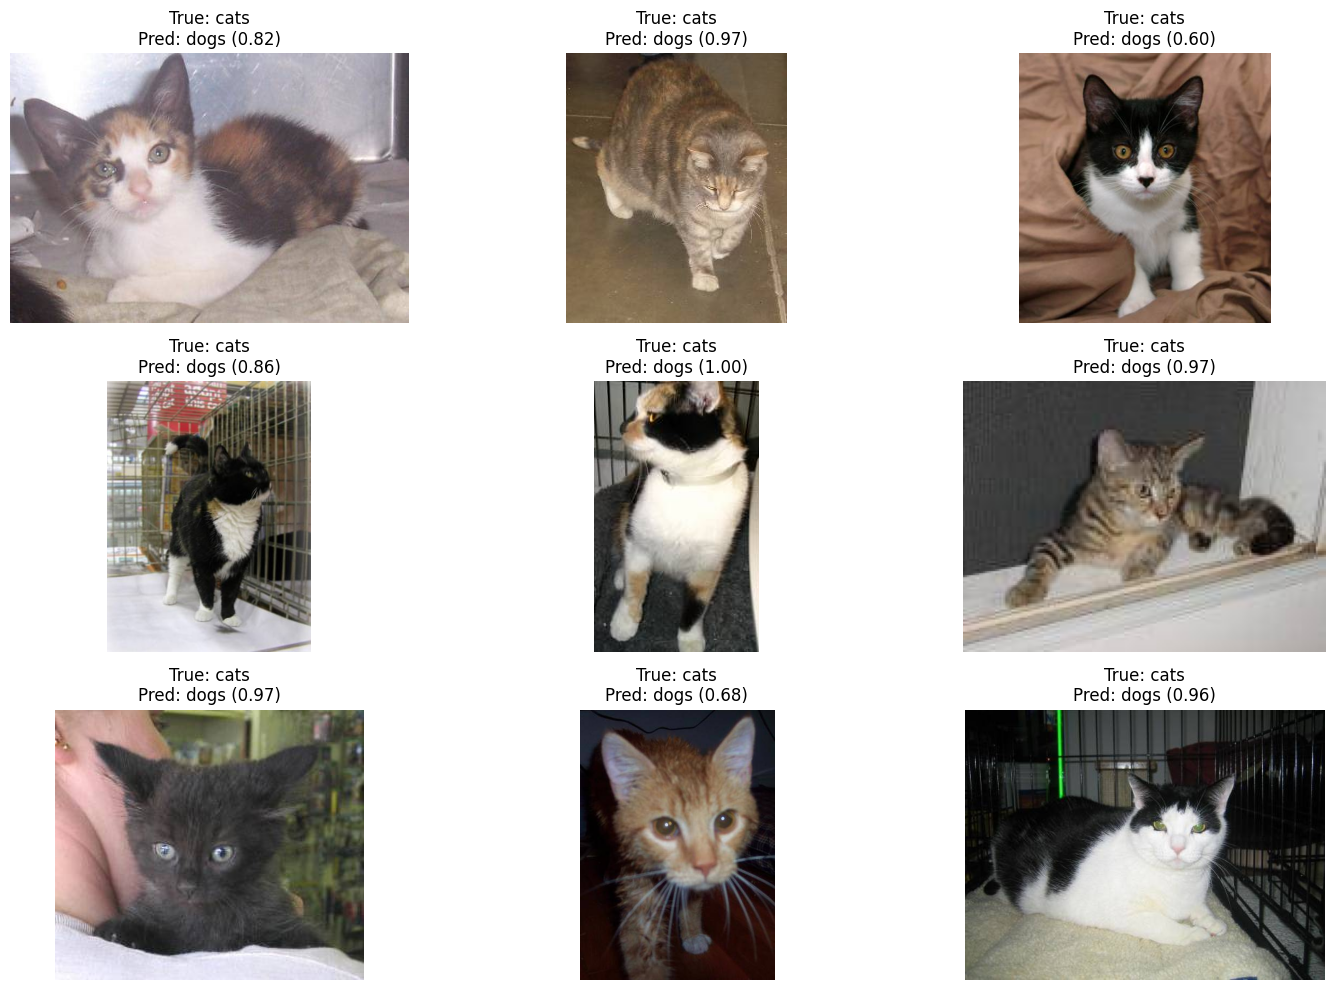

In [50]:
# Get file names and labels
filenames = val_generator.filenames
class_labels = list(val_generator.class_indices.keys())

# Find misclassified samples
misclassified_idx = np.where(y_pred_classes.flatten() != y_true)[0]

# Display some misclassified images
plt.figure(figsize=(15, 10))
for i, idx in enumerate(misclassified_idx[:9]):  # Show first 9 misclassified
    img_path = os.path.join(val_dir, filenames[idx])
    img = plt.imread(img_path)

    plt.subplot(3, 3, i+1)
    plt.imshow(img)
    plt.title(f"True: {class_labels[y_true[idx]]}\nPred: {class_labels[y_pred_classes[idx][0]]} ({y_pred[idx][0]:.2f})")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [51]:
print("\n=== Key Observations ===")
print("1. Augmentation typically:")
print("   - Reduces gap between train/val accuracy")
print("   - May lower training accuracy but improve validation accuracy")
print("   - Helps prevent overfitting")

print("\n2. Regularization effects:")
print("   - Stronger regularization often requires more epochs to converge")
print("   - Moderate regularization usually provides best balance")

print("\n3. Best performing model:")
best_model_name = labels[best_model_idx]
print(f"   - {best_model_name} with val accuracy: {max(histories[best_model_idx].history['val_accuracy']):.4f}")

print("\n4. Common misclassifications:")
print("   - Examine the displayed images to identify patterns")
print("   - Note if certain breeds/angles are consistently problematic")


=== Key Observations ===
1. Augmentation typically:
   - Reduces gap between train/val accuracy
   - May lower training accuracy but improve validation accuracy
   - Helps prevent overfitting

2. Regularization effects:
   - Stronger regularization often requires more epochs to converge
   - Moderate regularization usually provides best balance

3. Best performing model:
   - dropout with val accuracy: 0.8506

4. Common misclassifications:
   - Examine the displayed images to identify patterns
   - Note if certain breeds/angles are consistently problematic
